In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import theano.tensor as tt
from theano import shared
import pandas as pd
from matplotlib import gridspec
from sklearn.decomposition import PCA, KernelPCA
from mpl_toolkits.mplot3d import Axes3D
# from Plot_XZ import *
# from PCA import *

D:\Softwares\Python\Python_Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
plt.style.use('default')

font1 ={'family': 'times', 'weight':'light', 'size': 9} 
# font2 ={'family': 'Arial', 'weight':'normal', 'size': 12}  
def Plot_XZ(elec_year, elec_faults, Savefig):
# 画出原始图
    Company_names = ['XZ', 'XJ', 'HLJ']
#     k = np.array([0, 41, 83])
    j= 0
    # j, k1 = 0, 6
    plt.figure(figsize=(4, 3), facecolor='w')
    Color = ['#696969', '#000000', '#B452CD', '#191970', '#5CACEE', '#6A5ACD', '#4169E1', '#8B008B','#912CEE','#CD69C9','#8B2252']
    A = []
    xp = np.linspace(1, 12, 12)
    ax = plt.subplot(1, 1, 1)

    ax.plot(elec_year[0], elec_faults[0], 'kv--', markersize=4, linewidth=1,  c=Color[0])
    ax.plot(elec_year[1], elec_faults[1], 'ko--', markersize=4, linewidth=1,  c=Color[1])
    ax.plot(elec_year[2], elec_faults[2], 'k>--', markersize=4, linewidth=1,  c=Color[2])
    ax.plot(elec_year[3], elec_faults[3], 'k<--', markersize=4, linewidth=1,  c=Color[3])
    ax.plot(elec_year[4], elec_faults[4], 'ks--', markersize=4, linewidth=1,  c=Color[4])
    ax.plot(elec_year[5], elec_faults[5], 'kp--', markersize=4, linewidth=1,  c=Color[5])
    ax.plot(elec_year[6], elec_faults[6], 'k*--', markersize=4, linewidth=1,  c=Color[6])
    
    ax.set_xlim(0.5, 12.5)
    ax.set_xticks(np.linspace(1,12,12)) 
    ax.set_xticklabels(['2011.3', '', '2012.3', '','2013.3','', '2014.3','',  '2015.3', '', '2016.3', ''], fontsize='small')
    
    ax.set_xticklabels(['10.3', '2010.3', '11.3', '','12.3','', '13.3','',  '14.3', '', '15.3'], fontsize='small')
    ax.set_yticklabels(['0', '0','0.5', '1.0', '1.5', '2.0'], fontsize='small')
    
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)

    if Savefig == 1:
        plt.savefig('E:\Code\Bayescode\QW_reliable\LOFG_BN\Picture\\Raw1.png', dpi = 400, bbox_inches='tight')
    plt.show()
    plt.figure(figsize=(4, 3), facecolor='w')

    ax = plt.subplot(1, 1, 1)

    ax.plot(elec_year[7], elec_faults[7], 'kv--', markersize=4, linewidth=1,  c=Color[0])
    ax.plot(elec_year[8], elec_faults[8], 'ko--', markersize=4, linewidth=1,  c=Color[1])
    ax.plot(elec_year[9], elec_faults[9], 'k>--', markersize=4, linewidth=1,  c=Color[2])
    ax.plot(elec_year[10], elec_faults[10], 'k<--', markersize=4, linewidth=1,  c=Color[3])
    ax.plot(elec_year[11], elec_faults[11], 'ks--', markersize=4, linewidth=1,  c=Color[4])
    ax.plot(elec_year[12], elec_faults[12], 'kp--', markersize=4, linewidth=1,  c=Color[5])
    ax.plot(elec_year[13], elec_faults[13], 'k*--', markersize=4, linewidth=1,  c=Color[6])
    ax.plot(elec_year[14], elec_faults[14], 'k^--', markersize=4, linewidth=1,  c=Color[7])
    ax.plot(elec_year[15], elec_faults[15], 'k+--', markersize=4, linewidth=1,  c=Color[8])
    ax.plot(elec_year[16], elec_faults[16], 'kx--', markersize=4, linewidth=1,  c=Color[9])
    ax.plot(elec_year[17], elec_faults[17], 'kD--', markersize=4, linewidth=1,  c=Color[10])
#     ax.plot(elec_year[18], elec_faults[13], 'k*--', markersize=4, linewidth=1,  c=Color[6])

    ax.set_xlim(0.5, 12.5)
    ax.set_ylim(-0.1, 1.0)
    ax.set_xticks(np.linspace(1,12,12)) 
    ax.set_xticklabels(['2011.3', '', '2012.3', '','2013.3','', '2014.3','',  '2015.3', '', '2016.3', ''], fontsize='small')
    
    ax.set_xticklabels(['10.3', '', '11.3', '','12.3','', '13.3','',  '14.3', '', '15.3'], fontsize='small')
    ax.set_yticklabels(['0', '0','0.2', '0.4', '0.6', '0.8', '1.0'], fontsize='small')
    
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)

    if Savefig == 1:
        plt.savefig('E:\Code\Bayescode\QW_reliable\LOFG_BN\Picture\\Raw2.png', dpi = 400, bbox_inches='tight')
    plt.show()
    
    plt.figure(figsize=(4, 3), facecolor='w')
    ax = plt.subplot(1, 1, 1)
#     for jx in range(18, 25, 1):
#         ax.plot(elec_year[jx], elec_faults[jx], 'ko--', markersize=4, linewidth=1)

    ax.plot(elec_year[18], elec_faults[18], 'kv--', markersize=4, linewidth=1,  c=Color[0])
    ax.plot(elec_year[19], elec_faults[19], 'ko--', markersize=4, linewidth=1,  c=Color[1])
    ax.plot(elec_year[20], elec_faults[20], 'k>--', markersize=4, linewidth=1,  c=Color[2])
    ax.plot(elec_year[21], elec_faults[21], 'k<--', markersize=4, linewidth=1,  c=Color[3])
    ax.plot(elec_year[22], elec_faults[22], 'ks--', markersize=4, linewidth=1,  c=Color[4])
    ax.plot(elec_year[23], elec_faults[23], 'kp--', markersize=4, linewidth=1,  c=Color[5])
    ax.plot(elec_year[24], elec_faults[24], 'k*--', markersize=4, linewidth=1,  c=Color[6])

    ax.set_xlim(0.5, 12.5)
    ax.set_xticks(np.linspace(1,12,12)) 
    ax.set_xticklabels(['2011.3', '', '2012.3', '','2013.3','', '2014.3','',  '2015.3', '', '2016.3', ''], fontsize='small')
    ax.set_yticklabels(['0', '0','0.25','0.5','0.75', '1', '1.25', '1.5', '1.75'], fontsize='small')
    
    ax.set_xlabel("time(year)", fontdict=font1)
    plt.ylabel("Failure rate(%)", fontdict=font1)
#     plt.legend([Company_names[2]], loc='upper left', frameon=False, fontsize='small')
#     leg = plt.legend()
#     leg.get_frame().set_linewidth(0.0)
    if Savefig == 1:
        plt.savefig('E:\Code\Bayescode\QW_reliable\LOFG_BN\Picture\\Raw3.png', dpi = 400, bbox_inches='tight')
    plt.show()
    return 0

D:\Softwares\Python\Python_Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


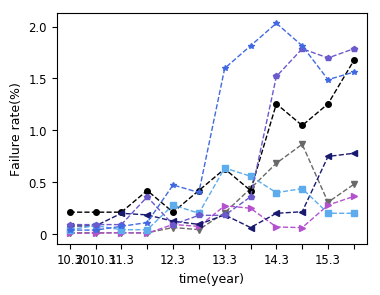

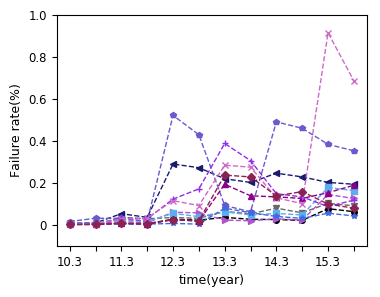

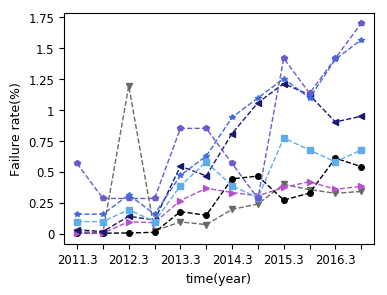

0

In [39]:
np.set_printoptions(precision=0, suppress=True)
Savefig = 1 # 控制图形显示存储

elec_data = pd.read_csv('XZnozero_12.csv')

# 计算同一公司产品测试地点数目：
companies_num = elec_data.counts.unique()
companies = len(companies_num)  # companies=7， 共7个测试地点
company_lookup = dict(zip(companies_num, range(len(companies_num))))
company = elec_data['company_code'] = elec_data.counts.replace(company_lookup).values  # 加一行数据在XZsingal文件中
# companys = elec_data.counts.values - 1 # 这一句以上面两行功能相同

# 计算不同公司数目
company_ABC = elec_data.company.unique()
companiesABC = len(company_ABC)  # companies=7， 共7个测试地点
company_lookup_ABC = dict(zip(company_ABC, range(len(company_ABC))))
companyABC = elec_data['company_ABC'] = elec_data.company.replace(company_lookup_ABC).values  # 加一行数据在XZsingal文件中
# companys = elec_data.counts.values - 1 # 这一句以上面两行功能相同
# elec_count = elec_data.counts.values

# 给所有特征因素加上高斯噪声
SNR = np.random.normal(0, 1, size=[len(elec_data.Year.values), 4])
SNR_Tem = np.random.normal(0, 0.5, size=[len(elec_data.Year.values), 1])
# #特征因素分析

elec_tem = elec_data.Tem.values + SNR_Tem[:, 0] # 观测温度值x2
elec_tem1 = (elec_tem - np.mean(elec_tem)) / np.std(elec_tem)
elec_hPa = elec_data.hPa.values + SNR[:, 1]  # 观测压强x3
elec_hPa1 = (elec_hPa - np.mean(elec_hPa)) / np.std(elec_hPa)
elec_RH = elec_data.RH.values + SNR[:, 2] # 观测压强x3
elec_RH1 = (elec_RH - np.mean(elec_RH)) / np.std(elec_RH)
elec_Lux = elec_data.Lux.values + SNR[:, 3] # 观测压强x3
elec_Lux1 = (elec_Lux - np.mean(elec_Lux)) / np.std(elec_Lux)


# 计算观测时间，温度，光照等环境条件
elec_year = elec_data.Year.values  # 观测时间值x1
Norm_year_Mean = np.mean(elec_year)
Norm_year_std = np.std(elec_year)
elec_year1 = (elec_year - np.mean(elec_year)) / np.std(elec_year)
data_cs_year = elec_year
# data_cs_year[42:45] = 12
# print(elec_year1)

elec_data.Fault.values[202] =200
elec_data.Fault.values[203] =150
elec_data.Fault.values[218] =165
# 计算故障率大小：故障数目/总测量数，作为模型Y值，放大100倍以增加实际效果，结果中要缩小100倍
elec_faults = 100 * (elec_data.Fault.values / elec_data.Nums.values)  # 数组形式,计算故障率大小
elec_faults1 = (elec_faults - np.mean(elec_faults)) / np.std(elec_faults)

# print(elec_faults)
# 将故障率以6组一行形式组成数组,变成：21*6
elec_faults2 = np.array([elec_faults[i*12:(i+1)*12] for i in np.arange(25)])
elec_year2 = np.array([elec_year1[i*12:(i+1)*12] for i in np.arange(25)])
elec_char1 = np.array([elec_tem1[i*12:(i+1)*12] for i in np.arange(25)])
elec_char2 = np.array([elec_hPa1[i*12:(i+1)*12] for i in np.arange(25)])
companyABC2 = np.array([companyABC[i*12:(i+1)*12] for i in np.arange(25)])

# 共享变量设置
xs_char1 = shared(np.asarray(elec_tem1))
xs_char2 = shared(np.asarray(elec_hPa1))
xs_char3 = shared(np.asarray(elec_RH1))

ys_faults = shared(np.asarray(elec_faults))
xs_year = shared(np.asarray(elec_year1))
Num_shared = shared(np.asarray(companyABC))
# print(companyABC)
# print(companiesABC)
# print(len(data_cs_year))
# print(len(elec_faults))
# 画图
elec_year3 = np.array([elec_year[i*12:(i+1)*12] for i in np.arange(25)])
Plot_XZ(elec_year3, elec_faults2, Savefig)

In [28]:
Beta_Mu_2 = np.loadtxt('BNLOF_Pred.csv',delimiter = ',')
Beta_Mu_1 = np.loadtxt('BNnoLOF_Pred.csv',delimiter = ',')

Y_NNpred = np.loadtxt('Y_NNpred.csv',delimiter = ',')
Y_SVMpred = np.loadtxt('Y_SVMpred.csv',delimiter = ',')
print(Beta_Mu_1)

# 读取LOF权重处理之后的数据
Weight_Fault_ABC_All = np.loadtxt('Weight_Fault_ABC_All.csv',delimiter = ',')
Weight_Fault_ABC_All2 = np.array([Weight_Fault_ABC_All[i*12:(i+1)*12] for i in np.arange(25)])

[[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]]


D:\Softwares\Python\Python_Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


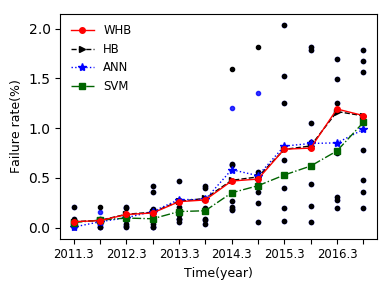

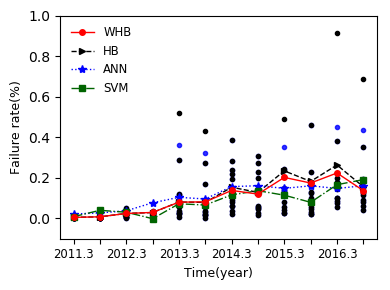

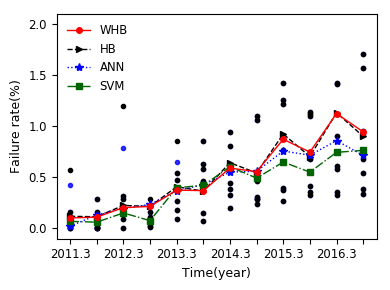

In [46]:
font1 ={'family': 'Times', 'weight':'normal', 'size': 9}  

fig = plt.figure(figsize=(4, 3))
# for ip in np.arange(companiesABC):
ax = plt.subplot(1, 1, 1)
xl = [1,2,3,4,5,6,7,8,9,10,11,12]
ip=0

y1 = Beta_Mu_2[ip]
y2 = Beta_Mu_1[ip]
y3 = Y_NNpred[ip]
y4 = Y_SVMpred[ip]


xp = elec_year2[ip*7:(ip+1)*7, :]*Norm_year_std + Norm_year_Mean
yp = Weight_Fault_ABC_All2[ip*7:(ip+1)*7, :]
yp_old = elec_faults2[ip*7:(ip+1)*7, :]
plt.scatter(xp, yp, marker='o', alpha=0.8, c='b',s=9, linewidths=1)
plt.scatter(xp, yp_old, marker='o', alpha=1.0, c='k',s=9, linewidths=1)

ax2, = plt.plot(xl, y2,  'k>--', markersize=4,  linewidth=1)
ax3, = plt.plot(xl, y3, '*:', color='b', linewidth=1)
ax4, = plt.plot(xl, y4, 's-.', color='#006400', markersize=4, linewidth=1)
ax1, = plt.plot(xl, y1, 'ro-', markersize=4,  linewidth=1)

ax.set_xlim(0.5, 12.5)
ax.set_xticks(np.linspace(1,12,12)) 
ax.set_xticklabels(['2011.3', '', '2012.3', '','2013.3','', '2014.3','',  '2015.3', '', '2016.3', ''], fontsize='small')

plt.xlabel("Time(year)", fontdict=font1)
plt.ylabel("Failure rate(%)", fontdict=font1)
plt.legend([ax1, ax2, ax3, ax4], ['WHB', 'HB','ANN','SVM'], loc='upper left', frameon=False, fontsize='small')
    
plt.tight_layout()
plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\Compare1.png', dpi = 400, bbox_inches='tight')
plt.show()



fig = plt.figure(figsize=(4, 3))
# for ip in np.arange(companiesABC):
ax = plt.subplot(1, 1, 1)
ip=1

y1 = Beta_Mu_2[ip]
y2 = Beta_Mu_1[ip]
y3 = Y_NNpred[ip]
y4 = Y_SVMpred[ip]


xp = elec_year2[ip*7:((ip+1)*7+4), :]*Norm_year_std + Norm_year_Mean
yp = Weight_Fault_ABC_All2[ip*7:((ip+1)*7+4), :]
yp_old = elec_faults2[ip*7:((ip+1)*7+4), :]
plt.scatter(xp, yp, marker='o', alpha=0.8, c='b',s=9, linewidths=1)
plt.scatter(xp, yp_old, marker='o', alpha=1.0, c='k',s=9, linewidths=1)

ax2, = plt.plot(xl, y2,  'k>--', markersize=4,  linewidth=1)
ax3, = plt.plot(xl, y3, '*:', color='b', linewidth=1)
ax4, = plt.plot(xl, y4, 's-.', color='#006400', markersize=4, linewidth=1)
ax1, = plt.plot(xl, y1, 'ro-', markersize=4,  linewidth=1)

ax.set_xlim(0.5, 12.5)
ax.set_ylim(-0.1, 1.0)
ax.set_xticks(np.linspace(1,12,12)) 
ax.set_xticklabels(['2011.3', '', '2012.3', '','2013.3','', '2014.3','',  '2015.3', '', '2016.3', ''], fontsize='small')

plt.xlabel("Time(year)", fontdict=font1)
plt.ylabel("Failure rate(%)", fontdict=font1)
plt.legend([ax1, ax2, ax3, ax4], ['WHB', 'HB','ANN','SVM'], loc='upper left', frameon=False, fontsize='small')
    
plt.tight_layout()
plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\Compare2.png', dpi = 400, bbox_inches='tight')
plt.show()




fig = plt.figure(figsize=(4, 3))
# for ip in np.arange(companiesABC):
ax = plt.subplot(1, 1, 1)
ip=2

y1 = Beta_Mu_2[ip]
y2 = Beta_Mu_1[ip]
y3 = Y_NNpred[ip]
y4 = Y_SVMpred[ip]


xp = elec_year2[18:25, :]*Norm_year_std + Norm_year_Mean
yp = Weight_Fault_ABC_All2[18:25, :]
yp_old = elec_faults2[18:25, :]
plt.scatter(xp, yp, marker='o', alpha=0.8, c='b',s=9, linewidths=1)
plt.scatter(xp, yp_old, marker='o', alpha=1.0, c='k',s=9, linewidths=1)



ax2, = plt.plot(xl, y2,  'k>--', markersize=4,  linewidth=1)
ax3, = plt.plot(xl, y3, '*:', color='b', linewidth=1)
ax4, = plt.plot(xl, y4, 's-.', color='#006400', markersize=4, linewidth=1)
ax1, = plt.plot(xl, y1, 'ro-', markersize=4,  linewidth=1)

plt.xlabel("Time(year)", fontdict=font1)
plt.ylabel("Failure rate(%)", fontdict=font1)
plt.legend([ax1, ax2, ax3, ax4], ['WHB', 'HB','ANN','SVM'], loc='upper left', frameon=False, fontsize='small')

ax.set_xlim(0.5, 12.5)
ax.set_ylim(-0.1, 2.1)
ax.set_xticks(np.linspace(1,12,12)) 
ax.set_xticklabels(['2011.3', '', '2012.3', '','2013.3','', '2014.3','',  '2015.3', '', '2016.3', ''], fontsize='small')

# ax.set_yticklabels(['0', '0','0.25', '0.5', '0.75', '1.0', '1.25', '1.5', '1.75', '2.0'], fontsize='small')
plt.yticks(fontsize='small')

plt.tight_layout()
plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\Compare3.png', dpi = 400, bbox_inches='tight')
plt.show()

[0. 1. 2.]


D:\Softwares\Python\Python_Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


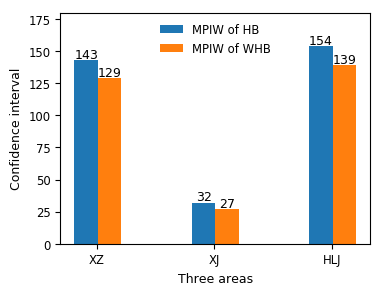

In [91]:
# 置信区间大小
Model_MPIW1 = [143, 32, 154]
Model_MPIW2 = [129, 27, 139]

size = 3
x = np.arange(size)

total_width, n = 0.6, 3
width = total_width / n
x = x + (total_width - width) / 2
print(x)
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
ax.bar(x, Model_MPIW1, width=width, label='MPIW of HB')
ax.bar(x + width, Model_MPIW2, width=width, label='MPIW of WHB')
for xx, yy in zip(x, Model_MPIW1):
    ax.text(xx, yy+1.8, str(yy), ha='center',fontsize=9)
for xx, yy in zip(x+ width, Model_MPIW2):
    ax.text(xx, yy+1.8, str(yy), ha='center',fontsize=9)

# ax.set_xlim(0.5, 12.5)
ax.set_ylim(0, 180)
ax.set_yticks(np.linspace(0,175,8)) 
ax.set_xticks(np.linspace(0.29,2.29,3)) 
ax.set_xticklabels(['XZ', 'XJ', 'HLJ'], fontsize='small')

ax.set_yticklabels(['0','25', '50', '75', '100', '125', '150', '175'], fontsize='small')

plt.legend(loc='upper center', frameon=False, fontsize='small')

plt.xlabel("Three areas", fontdict=font1)
plt.ylabel("Confidence interval", fontdict=font1)

plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\Interal_BN.png', dpi = 400, bbox_inches='tight')
plt.show()


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


D:\Softwares\Python\Python_Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


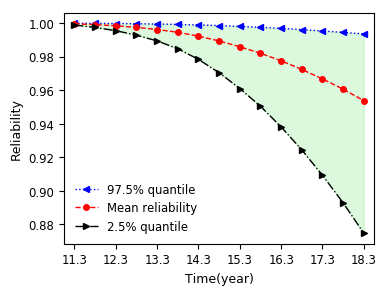

In [116]:
# 可靠度计算，beta_mu要除以100还原
font2 ={'family': 'Times', 'weight':'normal', 'size': 9}  
R11 = np.loadtxt('Reliabily_AAA.csv',delimiter = ',')
R22 = np.loadtxt('Reliabily_BBB.csv',delimiter = ',')
R33 = np.loadtxt('Reliabily_CCC.csv',delimiter = ',')



t = np.arange(1, 16, 1)
print(t)
fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
# plt.plot(t, R22, 'k:', t, R11, 'ro-', t, R33, 'k-.')
ax.plot(t, R22, 'b<:', markersize=4, linewidth=1)
ax.plot(t, R11, 'ro--', markersize=4, linewidth=1)
ax.plot(t, R33, 'k>-.', markersize=4, linewidth=1)
plt.fill_between(t, R22, R33, color='#90EE90', alpha=.3) 

ax.set_xlim(0.5, 15.5)
ax.set_xticks(np.linspace(1,15,8)) 
ax.set_xticklabels(['11.3', '12.3', '13.3',  '14.3',  '15.3',  '16.3',  '17.3',  '18.3'], fontsize='small')

plt.yticks(fontsize='small')
plt.xticks(fontsize='small')

ax.set_xlabel("Time(year)", fontdict=font2)
plt.ylabel("Reliability", fontdict=font2)

ax.legend(['97.5% quantile','Mean reliability','2.5% quantile'], loc='lower left',frameon=False, fontsize='small')

plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\Reliability_New.png', dpi = 400, bbox_inches='tight')
plt.show()

D:\Softwares\Python\Python_Anaconda\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['Times'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


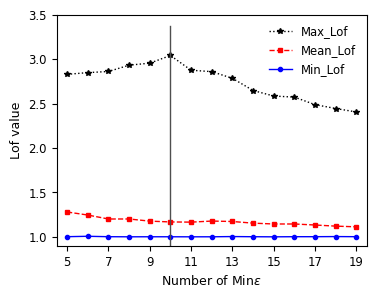

In [153]:
LOF_B = np.loadtxt('LOF_B.csv',delimiter = ',')

fig = plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)

x_plot = np.linspace(5, 5+14, 15)
ax.plot(x_plot, LOF_B[0], 'k*:', markersize=4, linewidth=1)
ax.plot(x_plot, LOF_B[1], 'rs--', markersize=3, linewidth=1)
ax.plot(x_plot, LOF_B[2], 'bo-', markersize=3, linewidth=1)
plt.axvline(10,  ymax=0.95, linewidth=1, color='#4F4F4F')

ax.set_xlim(4.5, 19.5)
ax.set_ylim(0.9, 3.5)
ax.set_xticks(np.linspace(5.0,19.0,8)) 
ax.set_xticklabels(['5', '7', '9',  '11',  '13',  '15',  '17',  '19'], fontsize='small')
plt.yticks(fontsize='small')
plt.xticks(fontsize='small')

plt.xlabel("Number of Min$ε$", fontdict=font1)
plt.ylabel("Lof value", fontdict=font1)

ax.legend(['Max_Lof','Mean_Lof','Min_Lof'], loc='upper right',frameon=False, fontsize='small')
plt.savefig('E:\\Code\\Bayescode\\QW_reliable\\LOFG_BN\\Picture\\LOF_Max.png', dpi = 400, bbox_inches='tight')
plt.show()